In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import inspect

In [2]:
def negbin(mean,R,x):
    p = (mean / R) * (1/(1+(mean/R)))
    return ((math.factorial(x + R -1))/(math.factorial(x)*math.factorial(R -1))) * (p ** x) * ((1-p)**R)

In [3]:
model = pd.DataFrame(data =({ 'N' : list(range(0,30,1))}))
r = 120
margin = 0.97

In [4]:
lamb = list()
def frange(lis,x,y,z):
    while x < y:
        lis.append(x)
        x += z
        
frange(lamb,9,12,0.02)

In [5]:
under = list()
for i in lamb:
    model['prob'] = model.apply(lambda y: negbin(i , r , y['N']) , axis=1)
    model['price'] = 1 / model['prob']
    under.append( margin / model.prob[0:11].sum())

In [6]:
to_exp = pd.DataFrame(data =({'Lambda' : lamb , 'Under_Price' : under}))

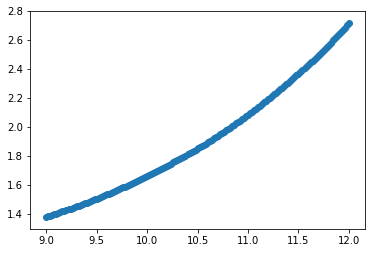

In [7]:
plt.scatter(lamb , under)

In [8]:
#to_exp.to_csv('C:/Users/Oliver/Downloads/lambda_lookup_105.csv')